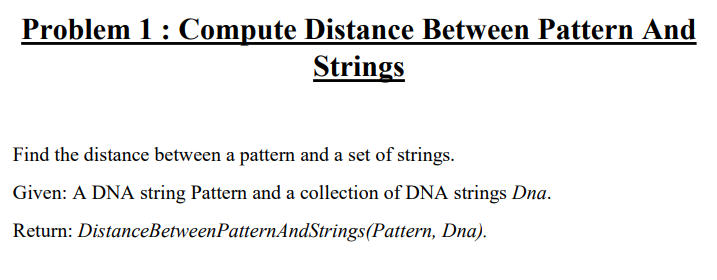

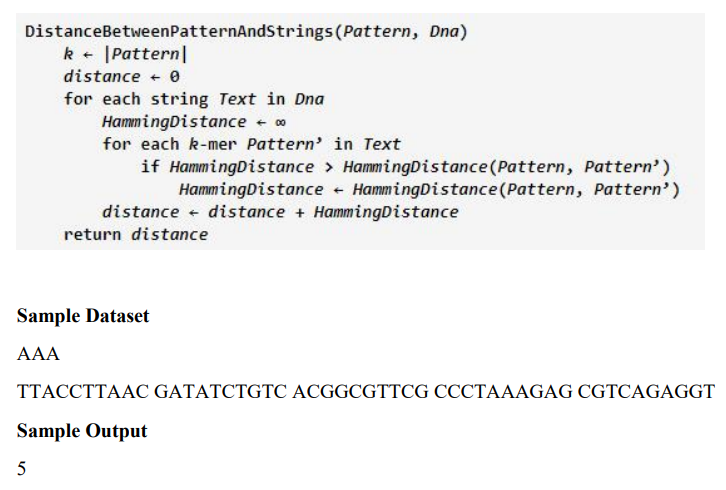

In [4]:
def HammingDistance(text1, text2):
  d=0
  for i in range(len(text1)):
    if text1[i] != text2[i]:
      d+=1
  return d

In [5]:
def DistanceBetweenPatternAndStrings(Pattern, DNA):
  dist = 0
  k = len(Pattern)
  for dna_str in DNA:
    kmerdist = {dna_str[i:i+k]:HammingDistance(Pattern, dna_str[i:i+k]) for i in range(len(dna_str)-k+1)}
    dist += min(kmerdist.values())
  return dist

print(DistanceBetweenPatternAndStrings('AAA', ['TTACCTTAAC', 'GATATCTGTC', 'ACGGCGTTCG', 'CCCTAAAGAG', 'CGTCAGAGGT']))

5


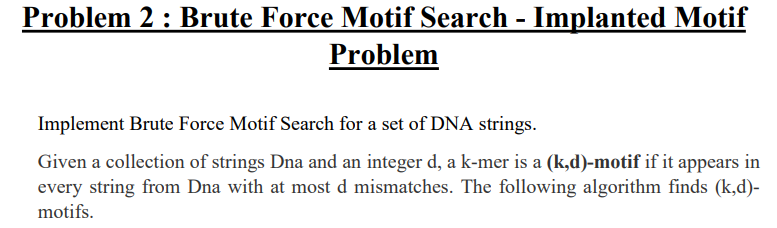

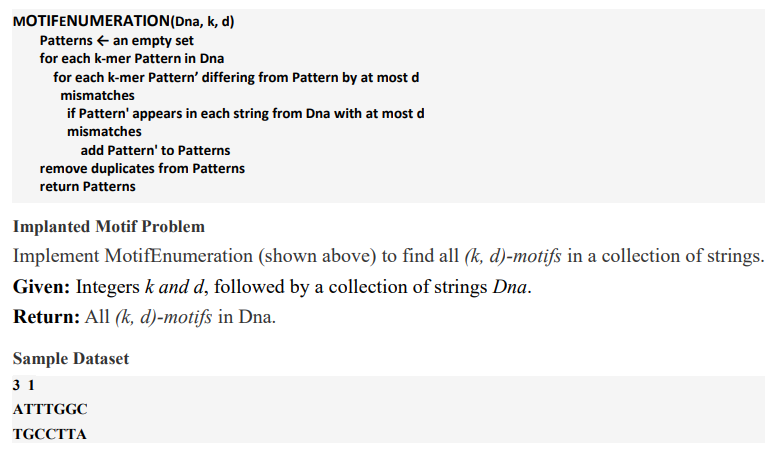

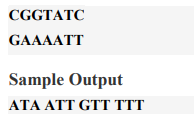

In [8]:
def generate_kmers(k):
  kmers = ['']
  bases = ['A', 'G', 'C', 'T']
  if k == 1:
    return bases
  for _ in range(k):
    imer = []
    for kmer in kmers:
      for base in bases:
        imer.append(kmer + base)
    kmers = imer
  return kmers


def MotifEnumeration(dna, k, d):
    patterns = set()
    for i in range(len(dna[0]) - k + 1):
        kmer = dna[0][i:i+k]
        neighbors = generate_kmers(k)
        for neighbor in neighbors:
            if sum([HammingDistance(neighbor, dna_str[i:i+k]) <= d for dna_str in dna]) == len(dna):
                patterns.add(neighbor)
    return patterns

dna = ['ATTTGGC', 'TGCCTTA', 'CGGTATC', 'GAAAATT']
k = 3
d = 1
motifs = MotifEnumeration(dna, k, d)
print("Motifs found:", motifs)


Motifs found: set()


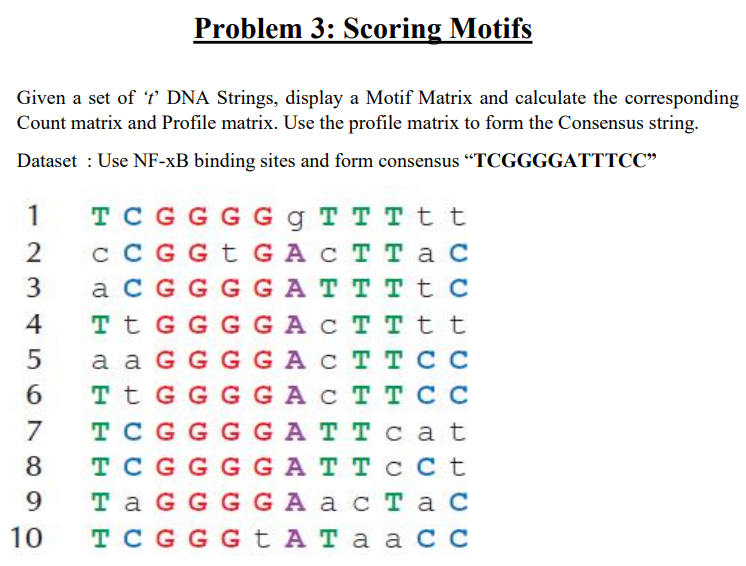

In [1]:
def count(motifs):
    k = len(motifs[0])
    counts = {nucleotide: [0] * k for nucleotide in ['A', 'C', 'G', 'T']}
    for i in range(k):
        for motif in motifs:
            counts[motif[i]][i] += 1
    return counts

def profile(motifs):
    k = len(motifs[0])
    counts = count(motifs)
    return {nucleotide: [count / len(motifs) for count in counts[nucleotide]] for nucleotide in ['A', 'C', 'G', 'T']}

def consensus(profile):
    k = len(profile['A'])
    return ''.join(max(profile, key=lambda nucleotide: profile[nucleotide][i]) for i in range(k))

motifs = ["TCGGGGGTTTTT",
        "CCGGTGACTTAC",
        "ACGGGGATTTTC",
        "TTGGGGACTTTT",
        "AAGGGGACTTCC",
        "TTGGGGACTTCC",
        "TCGGGGATTCAT",
        "TCGGGGATTCCT",
        "TAGGGGAACTAC",
        "TCGGGTATAACC"]
t = len(motifs)
counts = count(motifs)
profile = profile(motifs)
consensus_string = consensus(profile)

print("Motif Matrix:")
for motif in motifs:
    print(motif)
print("\nCount Matrix:")
for nucleotide in ['A', 'C', 'G', 'T']:
    print(f"{nucleotide}: {' '.join(map(str, counts[nucleotide]))}")
print("\nProfile Matrix:")
for nucleotide in ['A', 'C', 'G', 'T']:
    print(f"{nucleotide}: {' '.join(map(str, profile[nucleotide]))}")
print("\nConsensus String:", consensus_string)


Motif Matrix:
TCGGGGGTTTTT
CCGGTGACTTAC
ACGGGGATTTTC
TTGGGGACTTTT
AAGGGGACTTCC
TTGGGGACTTCC
TCGGGGATTCAT
TCGGGGATTCCT
TAGGGGAACTAC
TCGGGTATAACC

Count Matrix:
A: 2 2 0 0 0 0 9 1 1 1 3 0
C: 1 6 0 0 0 0 0 4 1 2 4 6
G: 0 0 10 10 9 9 1 0 0 0 0 0
T: 7 2 0 0 1 1 0 5 8 7 3 4

Profile Matrix:
A: 0.2 0.2 0.0 0.0 0.0 0.0 0.9 0.1 0.1 0.1 0.3 0.0
C: 0.1 0.6 0.0 0.0 0.0 0.0 0.0 0.4 0.1 0.2 0.4 0.6
G: 0.0 0.0 1.0 1.0 0.9 0.9 0.1 0.0 0.0 0.0 0.0 0.0
T: 0.7 0.2 0.0 0.0 0.1 0.1 0.0 0.5 0.8 0.7 0.3 0.4

Consensus String: TCGGGGATTTCC


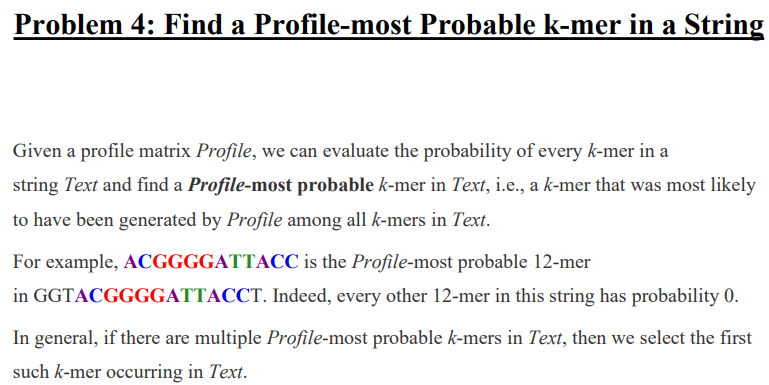

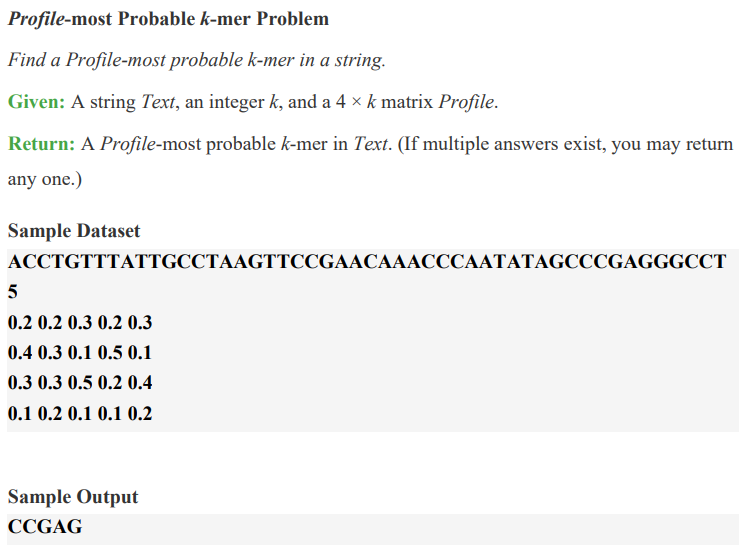

In [9]:
def most_probable_kmer(text, k, profile):
    max_prob = -1
    most_probable_kmer = ""

    for i in range(len(text) - k + 1):
        kmer = text[i:i+k]
        prob = 1
        prob *= max([p for base, prof in zip('ACGT', profile) for p, n in zip(prof, kmer) if n == base])
        if prob > max_prob:
            max_prob = prob
            most_probable_kmer = kmer

    return most_probable_kmer

text = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
k = 5
profile = [
    [0.2, 0.2, 0.3, 0.2, 0.3],
    [0.4, 0.3, 0.1, 0.5, 0.1],
    [0.3, 0.3, 0.5, 0.2, 0.4],
    [0.1, 0.2, 0.1, 0.1, 0.2]]

print(most_probable_kmer(text, k, profile))


CTGTT
